In [3]:
import pandas as pd
file_path = "F:\\AWFERA\\Machine learning\\AwferaMachineLearningProjects\\diabetes.csv"
df = pd.read_csv(file_path)

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [15]:
print(df.isnull().sum())
df.fillna(df.median(numeric_only =True), inplace= True)

for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0],inplace=True) 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
#Apply label encoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col]= le.fit_tansform(df[col])
    label_encoders[col]= le


In [8]:
from sklearn.preprocessing import StandardScaler
# separate features and target variable

x = df.drop(columns = ['Outcome'])  # Replace target with actual targer columns
y = df['Outcome']

#Apply standard scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [9]:
from sklearn.model_selection import train_test_split

# data splitting 
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)



In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()
#Train model 
model.fit(x_train, y_train)


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# predict on test data 
y_pred = model.predict(x_test)

print(y_pred)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [12]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print (f"Model Accuracy: { accuracy:.2f}")


Model Accuracy: 0.75


In [13]:
print("Classfication report")
print(classification_report(y_test, y_pred))

print("\n Confusion matric")
print(confusion_matrix(y_test, y_pred))

Classfication report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


 Confusion matric
[[79 20]
 [18 37]]


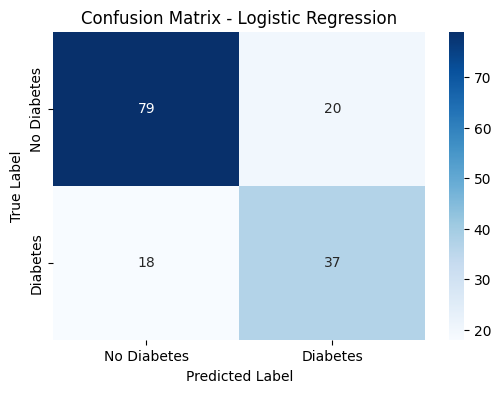

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [10]:
from sklearn.tree import DecisionTreeClassifier
# Initialize model
model = DecisionTreeClassifier()
#Train model 
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# predict on test data 
y_pred = model.predict(x_test)

#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print (f"Model Accuracy: { accuracy:.2f}")


Model Accuracy: 0.77
